<a href="https://www.kaggle.com/code/jackhuffman5519/ufo-eda?scriptVersionId=149754471" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from IPython.display import display
import geopandas as gpd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/ufo-sightings-around-the-world-better/ufo-sightings-transformed.csv


In [2]:
df_dirty = pd.read_csv("/kaggle/input/ufo-sightings-around-the-world-better/ufo-sightings-transformed.csv")
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')) 
display(df_dirty.head())

/tmp/ipykernel_20/1830661507.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


,Unnamed: 0,Date_time,date_documented,Year,Month,Hour,Season,Country_Code,Country,Region,Locale,latitude,longitude,UFO_shape,length_of_encounter_seconds,Encounter_Duration,Description
0,0,1949-10-10 20:30:00,4/27/2004,1949,10,20,Autumn,USA,United States,Texas,San Marcos,29.883056,-97.941111,Cylinder,2700.0,45 minutes,This event took place in early fall around 194...
1,1,1949-10-10 21:00:00,12/16/2005,1949,10,21,Autumn,USA,United States,Texas,Bexar County,29.384210,-98.581082,Light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...
2,2,1955-10-10 17:00:00,1/21/2008,1955,10,17,Autumn,GBR,United Kingdom,England,Chester,53.200000,-2.916667,Circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...
3,3,1956-10-10 21:00:00,1/17/2004,1956,10,21,Autumn,USA,United States,Texas,Edna,28.978333,-96.645833,Circle,20.0,1/2 hour,My older brother and twin sister were leaving ...
4,4,1960-10-10 20:00:00,1/22/2004,1960,10,20,Autumn,USA,United States,Hawaii,Kaneohe,21.418056,-157.803611,Light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...


# Clean the data


In [3]:
#Get rid of Null values as well as redefining some columns
df = df_dirty.fillna('0')
df = df.rename(columns = {'Unnamed: 0': 'Sighting'})
display(df.head(5))


,Sighting,Date_time,date_documented,Year,Month,Hour,Season,Country_Code,Country,Region,Locale,latitude,longitude,UFO_shape,length_of_encounter_seconds,Encounter_Duration,Description
0,0,1949-10-10 20:30:00,4/27/2004,1949,10,20,Autumn,USA,United States,Texas,San Marcos,29.883056,-97.941111,Cylinder,2700.0,45 minutes,This event took place in early fall around 194...
1,1,1949-10-10 21:00:00,12/16/2005,1949,10,21,Autumn,USA,United States,Texas,Bexar County,29.384210,-98.581082,Light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...
2,2,1955-10-10 17:00:00,1/21/2008,1955,10,17,Autumn,GBR,United Kingdom,England,Chester,53.200000,-2.916667,Circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...
3,3,1956-10-10 21:00:00,1/17/2004,1956,10,21,Autumn,USA,United States,Texas,Edna,28.978333,-96.645833,Circle,20.0,1/2 hour,My older brother and twin sister were leaving ...
4,4,1960-10-10 20:00:00,1/22/2004,1960,10,20,Autumn,USA,United States,Hawaii,Kaneohe,21.418056,-157.803611,Light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...


In [4]:
#Find Data Types
display(df.dtypes)

Sighting                         int64
Date_time                       object
date_documented                 object
Year                             int64
Month                            int64
Hour                             int64
Season                          object
Country_Code                    object
Country                         object
Region                          object
Locale                          object
latitude                       float64
longitude                      float64
UFO_shape                       object
length_of_encounter_seconds    float64
Encounter_Duration              object
Description                     object
dtype: object

In [5]:
#Verify no null columns
null = df.isnull().sum()

display(null)

Sighting                       0
Date_time                      0
date_documented                0
Year                           0
Month                          0
Hour                           0
Season                         0
Country_Code                   0
Country                        0
Region                         0
Locale                         0
latitude                       0
longitude                      0
UFO_shape                      0
length_of_encounter_seconds    0
Encounter_Duration             0
Description                    0
dtype: int64

# EDA

In [6]:
#Average encounter in mins
avg_min_enc= df['length_of_encounter_seconds'].mean()
mins = avg_min_enc / 60
print("The average encounter of an UFO lasted", mins.round(2), "Minutes")

The average encounter of an UFO lasted 150.29 Minutes


In [7]:
# Find the amount of sightings by date
count_date_year = df.groupby('Date_time').size().sort_values(ascending = False)
display(count_date_year.head())


Date_time
2010-07-04 22:00:00    36
2012-07-04 22:00:00    31
1999-11-16 19:00:00    27
2009-09-19 20:00:00    26
2011-07-04 22:00:00    25
dtype: int64

In [8]:
# Find the amount of sightings by year
count_year = df.groupby('Year').size().sort_values(ascending = False)
df['count_year'] = df['Year'].map(count_year)
display(count_year.head())

Year
2012    7357
2013    7037
2011    5107
2008    4820
2009    4541
dtype: int64

In [9]:
# Find the amount of sightings by month
count_month = df.groupby('Month').size().sort_values(ascending = False)
display(count_month.head()) 

Month
7     9519
8     8636
6     8152
9     7589
10    7407
dtype: int64

* Based on the initial findings, 2012 was the year with the most sightings. However, July was the month with the most sightings overall. When looking at the 'Date_time', the top two days with the most sightings were July 4th, both in 2012 with 31 and 2010 with 36.


In [10]:
# Find sightings by country
count_country = df.groupby('Country_Code').size().sort_values(ascending = False)
count_country = count_country.reset_index(name='counts')
display(count_country.head()) 

,Country_Code,counts
0,USA,70878
1,CAN,3592
2,GBR,2350
3,AUS,630
4,0,259


In [11]:
# Find sightings by shape
count_Shape = df.groupby('UFO_shape').size().sort_values(ascending = False)

display(count_Shape.head()) 

UFO_shape
Light       16565
Triangle     7865
Circle       7607
Fireball     6208
Other        5649
dtype: int64

## Graphs

In [12]:
world_sightings = world.merge(count_country, left_on='iso_a3', right_on='Country_Code', how = 'left')
world_sightings.dropna()
display(world_sightings)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country_Code,counts
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",FJI,3.0
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",TZA,1.0
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",CAN,3592.0
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",USA,70878.0
...,...,...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",SRB,9.0
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",NaN,NaN
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN,NaN
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",TTO,8.0


In [13]:
fig = px.choropleth(world_sightings,
                   geojson=world_sightings.geometry.__geo_interface__,
                   locations = world_sightings.index, color='counts',
                   color_continuous_scale='Greens', labels = {'counts', 'Number of Sightings'})
fig.update_geos(fitbounds='locations', visible = False)
fig.update_layout(margin = {"r":0,"t":0,"l":0,"b":0})
fig.show()

In [14]:
Codes = world_sightings['iso_a3'].head(30)
display(Codes)

0     FJI
1     TZA
2     ESH
3     CAN
4     USA
5     KAZ
6     UZB
7     PNG
8     IDN
9     ARG
10    CHL
11    COD
12    SOM
13    KEN
14    SDN
15    TCD
16    HTI
17    DOM
18    RUS
19    BHS
20    FLK
21    NOR
22    GRL
23    ATF
24    TLS
25    ZAF
26    LSO
27    MEX
28    URY
29    BRA
Name: iso_a3, dtype: object

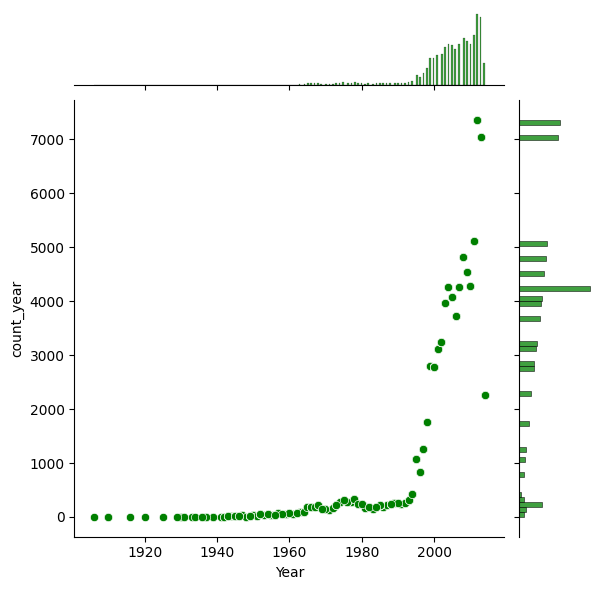

In [15]:
sns.jointplot(x ='Year', y ='count_year', data = df, color = 'Green')


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



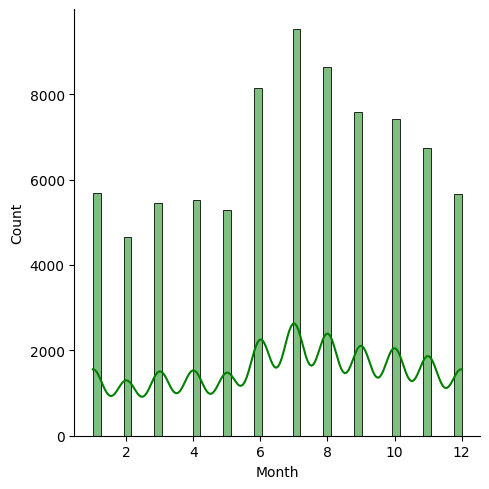

In [16]:
sns.displot(data=df, x="Month", kde=True, color="Green")

# Take Aways

* First, we notice based on graphs that the majority of UFO sightings are in the years of reporting, really picking up in 2000.

* Based on this, we can do some further EDA outside of this data set to try to correlate the reason for this.

* We also see that the United States has the majority of UFO sightings compared to the rest of the world. The difference between the first (USA) and second (Canada) seems to be quite the gap. Again, extra EDA is required to draw correlations.

* July proved to be the most popular month for UFO sightings, with the top two reports being on July 4th, 2010 and 2012.

* Additionally, the average encounter with a UFO lasted about 150 minutes.